In [ ]:
import pandas as pd

In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=811442a185ac5a9ce44df8be65029af1ad30627b2522be0c44d32e92e5397a54
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [5]:
!pyspark --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.5.0
      /_/
                        
Using Scala version 2.12.18, OpenJDK 64-Bit Server VM, 11.0.20.1
Branch HEAD
Compiled by user ubuntu on 2023-09-09T01:53:20Z
Revision ce5ddad990373636e94071e7cef2f31021add07b
Url https://github.com/apache/spark
Type --help for more information.


Lien pour accéder aux données : https://drive.google.com/drive/folders/1E2araQIJOddqSVWm1cymHWezHAbK8-dq?usp=drive_link

In [6]:
from pyspark.sql import SparkSession

In [28]:
# Création d'une dataframeà partir de la lecture d'un fichier
MyFirstDF = SparkDVF.read.csv("/content/drive/MyDrive/Datalake/01_RawData/valeursfoncieres*.txt", header=True,sep="|")
MyFirstDF.count()

16426333

In [30]:
# Sauvegarde de la DataFrame au format Parquet
MyFirstDF.write.parquet("/content/drive/MyDrive/Datalake/02_FormatChange/DVF_2019_2022.parquet")

In [31]:
# Vérification du nombre d'enregistrement dans le fichier parquet
MySecondDF = SparkDVF.read.parquet("/content/drive/MyDrive/DataLake/02_FormatChange/DVF_2019_2022.parquet")
MySecondDF.count()

16426333

In [39]:
MySecondDF.show()

+-----------------------+------------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+---------------+---------------+-------+-----+------------+---------+--------------------+-----------+----------------+----------------+------------+------------------+-------+-------+---------+-------+-------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------+--------------------------+--------------+---------------+--------------------+-----------------+-------------------+-------------------------+--------------+-----------------------+---------------+
|Identifiant de document|Reference document|1 Articles CGI|2 Articles CGI|3 Articles CGI|4 Articles CGI|5 Articles CGI|No disposition|Date mutation|Nature mutation|Valeur fonciere|No voie|B/T/Q|Type de voie|Code voie|                Voie|Code postal|         Commune|Code departement|Code commune|Prefixe de 

In [44]:
from pyspark.sql.functions import count, year, when
from pyspark.sql import functions as F

# Convertir la colonne "Date mutation" en format date
MySecondDF = MySecondDF.withColumn("Date mutation", F.to_date(MySecondDF["Date mutation"], "dd/MM/yyyy"))

# Filtrer l'année 2021
new_df_filtered = MySecondDF.filter((F.year(MySecondDF["Date mutation"]) >= 2021) & (F.year(MySecondDF["Date mutation"]) < 2022))

result = new_df_filtered.groupBy("Commune") \
                        .agg(F.count(F.when(new_df_filtered["Nature mutation"] == "Vente", 1)).alias("Nombre total de ventes"))

# Classer les résultats par ordre décroissant du nombre total de ventes
result = result.orderBy(F.desc("Nombre total de ventes"))

# Afficher les résultats
result.show(50)

+--------------------+----------------------+
|             Commune|Nombre total de ventes|
+--------------------+----------------------+
|            TOULOUSE|                 26408|
|                NICE|                 20674|
|            BESANCON|                 20013|
|              NANTES|                 15735|
|         MONTPELLIER|                 15349|
|       SAINT-ETIENNE|                 14461|
|            BORDEAUX|                 13322|
|               DIJON|                 12206|
|    LA SEYNE SUR MER|                 12069|
|               LILLE|                 11611|
|              RENNES|                 10431|
|               NIMES|                  9401|
|            GRENOBLE|                  9122|
|              CANNES|                  9101|
|            PARIS 15|                  8739|
|              TOULON|                  8709|
|             LE MANS|                  8498|
|               REIMS|                  8482|
|               BREST|            

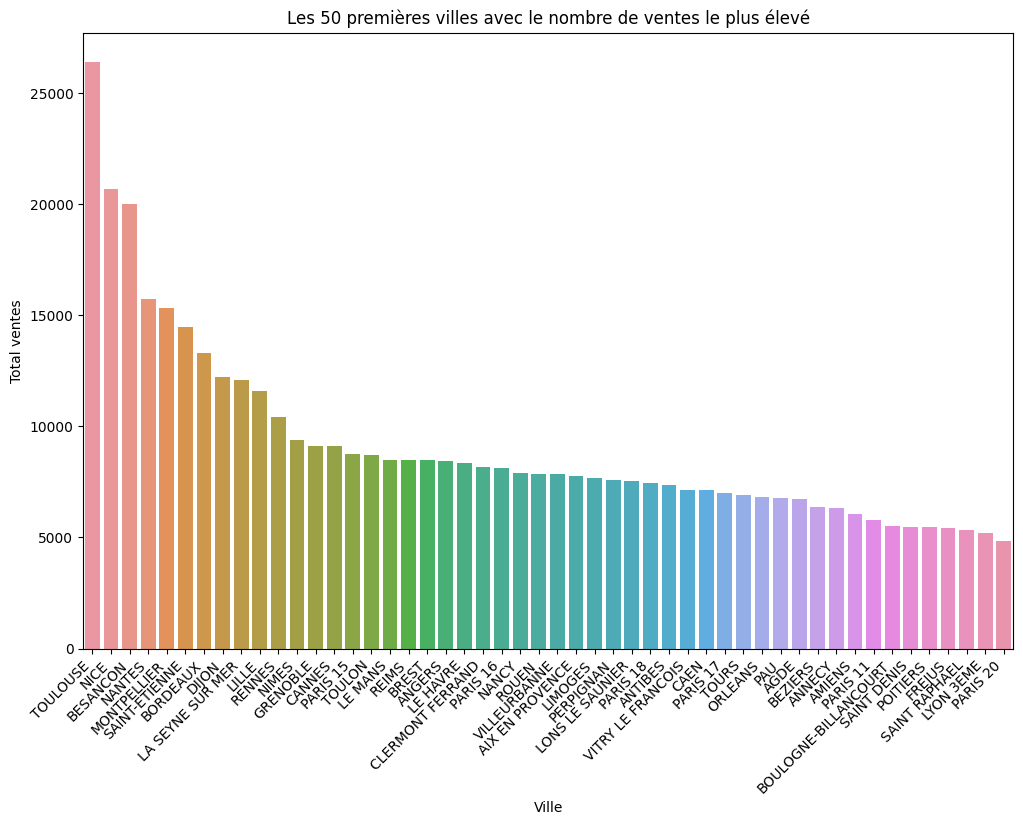

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

result_pandas = result.limit(50).toPandas()

# Utiliser Seaborn pour tracer un graphique en barres
plt.figure(figsize=(12, 8))
sns.barplot(data=result_pandas, x='Commune', y='Nombre total de ventes')
plt.title('Les 50 premières villes avec le nombre de ventes le plus élevé')
plt.xlabel('Ville')
plt.ylabel('Total ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()
